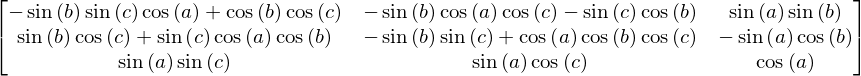

In [315]:
# 第一回転規準: z-x-z
AAA = Matrix([[ cos(c),-sin(c),0],
            [sin(c),cos(c),0],
            [0,0,1]])
BBB = Matrix([[1,0,0],
            [0, cos(a),-sin(a)],
            [0, sin(a),cos(a)]])
CCC = Matrix([[ cos(b),-sin(b),0],
            [ sin(b),cos(b),0],
            [0,0,1]])
AI = CCC*BBB*AAA
AI

In [448]:
# sin(a)*sin(c) = cos(ap)となるようなapを求めたい。
sina = math.sin(ea)
cosa = math.cos(ea)
sinb = math.sin(eb)
cosb = math.cos(eb)
sinc = math.sin(ec)
cosc = math.cos(ec)

# atan2はsin、cosを引数として角度を返す。
ap = math.acos(sina*sinc)
cp = math.atan2(sina*cosc, cosa)
bp = math.atan2(-sinb*sinc*cosa+cosb*cosc, -sinb*cosc-sinc*cosa*cosb)
print(A1(ap,bp,cp)@intra2)


[[ 0.6647 -0.7793  0.0072 -0.0093]
 [-0.0414 -0.369   0.0256 -0.0335]
 [ 0.633   0.3174 -0.0594  0.0775]]


In [13]:
import numpy as np
import math
# TIP4Pの座標系
angle,holen,colen = 104.52,0.9572,0.15
wh = 1.0
wo = 16.0
wm = wh + wh + wo
rangle = angle*math.pi/360
ohz=holen*math.cos(rangle)
hyl=holen*math.sin(rangle)
hzl=wo*ohz/wm
ol=-ohz+hzl
cl=colen+ol
# 分子内の原子位置
intra = np.array([[0,hyl,hzl],
                  [0,-hyl,hzl],
                  [0,0,ol],
                  [0,0,cl]]).T
# 分子内座標の、軸を交換したもの
intra2 = np.zeros_like(intra)
intra2[0] = intra[1]
intra2[1] = intra[2]
intra2[2] = intra[0]

# 2分子の座標を読みこむ。
file = open("test.nx3a")
while True:
    line = file.readline()
    if len(line) == 0:
        break
    if "@NX3A" in line:
        line = file.readline()
        nmol = int(line)
        pos = []
        for i in range(nmol):
            line = file.readline()
            pos.append([float(x) for x in line.split()])
        pos = np.array(pos)
    if "@BOX3" in line:
        line = file.readline()
        cell = np.diag(np.array([float(x) for x in line.split()]))
        celli = np.linalg.inv(cell)

lc = [0 for i in range(nmol)]
        
from sympy import *

# おまじない
init_printing()

a,b,c=symbols('a b c')

B = Matrix([[ cos(c),-sin(c),0],
            [ sin(c), cos(c),0],
            [0,0,1]])
C = Matrix([[1,0,0],
            [0, cos(a),-sin(a)],
            [0, sin(a), cos(a)]])
D = Matrix([[ cos(b),-sin(b),0],
            [ sin(b), cos(b),0],
            [0,0,1]])
AI = D*C*B


# 解析的に回転行列を角度で微分し、それをpythonの関数とする。
A1 = lambdify([a,b,c],AI)
A1a = lambdify([a,b,c],diff(AI,a))
A1b = lambdify([a,b,c],diff(AI,b))
A1c = lambdify([a,b,c],diff(AI,c))
A1aa = lambdify([a,b,c],diff(AI,a,a))
A1bb = lambdify([a,b,c],diff(AI,b,b))
A1cc = lambdify([a,b,c],diff(AI,c,c))
A1ab = lambdify([a,b,c],diff(AI,a,b))
A1bc = lambdify([a,b,c],diff(AI,b,c))
A1ca = lambdify([a,b,c],diff(AI,c,a))



def conv_euler(ea,eb,ec):
    sina=math.sin(ea)
    sinb=math.sin(eb)
    sinc=math.sin(ec)
    cosa=math.cos(ea)
    cosb=math.cos(eb)
    cosc=math.cos(ec)

    ap = math.acos(sina*sinc)
    cp = math.atan2(sina*cosc, cosa)
    bp = math.atan2(-sinb*sinc*cosa+cosb*cosc, -sinb*cosc-sinc*cosa*cosb)
    return ap,bp,cp


for i in range(nmol):
    for j in range(i):
        print("distance {0}-{1}".format(i,j))
        print(np.linalg.norm(pos[i][0:3]-pos[j][0:3]))

# 回転行列に分子内座標をかけたもの。原子の重心からの空間座標
D0 = np.zeros([nmol,3,4])
# 回転行列の、角度による一階微分に、分子内座標をかけたもの。
# D1 == dR_i / da_i
D1 = np.zeros([nmol,3,3,4]) # molecule, euler angle, vectors, sites
# 回転行列の、角度による二階微分に、分子内座標をかけたもの。
# D2 == d^2 R_i / da db
D2 = np.zeros([nmol,3,3,3,4]) # molecule, euler angle1, angle2, vectors, sites

for i in range(nmol):
    ea,eb,ec = pos[i][3:6]
    print("criteria", abs(math.sin(ea)))
    if abs(math.sin(ea)) > 0.7:
        D0[i] = A1(ea,eb,ec) @ intra
        D1[i,0] = A1a(ea,eb,ec) @ intra
        D1[i,1] = A1b(ea,eb,ec) @ intra
        D1[i,2] = A1c(ea,eb,ec) @ intra
        D2[i,0,0] = A1aa(ea,eb,ec) @ intra
        D2[i,1,1] = A1bb(ea,eb,ec) @ intra
        D2[i,2,2] = A1cc(ea,eb,ec) @ intra
        D2[i,0,1] = A1ab(ea,eb,ec) @ intra
        D2[i,1,2] = A1bc(ea,eb,ec) @ intra
        D2[i,2,0] = A1ca(ea,eb,ec) @ intra
        D2[i,1,0] = D2[i,0,1]
        D2[i,2,1] = D2[i,1,2]
        D2[i,0,2] = D2[i,2,0]
    else:
        ea,eb,ec = conv_euler(ea,eb,ec)
        pos[i][3:6] = ea,eb,ec
        lc[i] = 1 # rotation order of second kind
        D0[i] = A1(ea,eb,ec) @ intra2
        D1[i,0] = A1a(ea,eb,ec) @ intra2
        D1[i,1] = A1b(ea,eb,ec) @ intra2
        D1[i,2] = A1c(ea,eb,ec) @ intra2
        D2[i,0,0] = A1aa(ea,eb,ec) @ intra2
        D2[i,1,1] = A1bb(ea,eb,ec) @ intra2
        D2[i,2,2] = A1cc(ea,eb,ec) @ intra2
        D2[i,0,1] = A1ab(ea,eb,ec) @ intra2
        D2[i,1,2] = A1bc(ea,eb,ec) @ intra2
        D2[i,2,0] = A1ca(ea,eb,ec) @ intra2
        D2[i,1,0] = D2[i,0,1]
        D2[i,2,1] = D2[i,1,2]
        D2[i,0,2] = D2[i,2,0]

# ***2
for i in range(nmol):
    ea,eb,ec = pos[i][3:6]
    print("***2",i,A1(ea,eb,ec)[0,1])
    print("***3",i,A1a(ea,eb,ec)[0,1])
# Tanaka programでの配列要素(1,2)は、Pythonでは[0,1]になる。
# 以後、縦横を精査。

distance 1-0
11.61469060948903
criteria 0.40908360695823176
criteria 0.9948288797062455
***2 0 -0.11003767953489299
***3 0 0.2726125750233493
***2 1 -0.22172940831677826
***3 1 -0.3752036933413856


In [14]:
# 当面、田中プログラムとの照合のために、エネルギーの単位は、水素2原子が1 Aにいる時のCoulomb力を1とする。
# 最終的にはもっと汎用の書き方にする。

# 相互作用関数。定数はすべて省略してあるが、定数は微分しても不変なのであとで定数をかけるだけでいい。
def phic(rL):
    return 1/rL

# 距離による一階微分
def phic_r(rL):
    return -1/rL**2

# 距離による二階微分
def phic_rr(rL):
    return 2/rL**3

# このあたりの関数も、できればsympyに生成させたい。
def dxixi(r, phi_r, phi_rr):
    # r is a vector
    rL2 = r@r
    rL = rL2**0.5
    return phi_r*(1 - r**2 / rL2) / rL + phi_rr*r**2 / rL2

def dxiyi(r, phi_r, phi_rr):
    # r is a vector
    rL2 = r@r
    rL = rL2**0.5
    xy = -phi_r*r[0]*r[1]/(rL2*rL) + phi_rr*r[0]*r[1]/rL2
    yz = -phi_r*r[1]*r[2]/(rL2*rL) + phi_rr*r[1]*r[2]/rL2
    zx = -phi_r*r[2]*r[0]/(rL2*rL) + phi_rr*r[2]*r[0]/rL2
    return xy,yz,zx

def phiLJ(r,a1,a2):
    rL2 = r@r
    return a1/rL2**6 - a2/rL2**3

def phiLJ_r(r,a1,a2):
    rL2 = r@r
    rL = rL2**0.5
    return -12*a1/rL**13 + 6*a2/rL**7

def phiLJ_rr(r,a1,a2):
    rL2 = r@r
    return 12*13*a1/rL2**7 - 6*7*a2/rL2**4

rout = 8.5
trans = 2.0
rin  = rout - trans

x,y = symbols('x y')
# F0 is a truncation function ranged in [0,1]
F0 = -(x-1)**3*(6*x**2+3*x+1)
# 関数区間を変更
F = F0.subs(x,(y-rin)/trans)
# 解析的な微分を、数値関数に変換する
Trunc = lambdify([y], F)
Trunc_r = lambdify([y], diff(F,y))
Trunc_rr = lambdify([y], diff(F,y,y))
Trunc(6.5), Trunc(8.5), Trunc_r(6.5), Trunc_r(8.5), Trunc_rr(6.5), Trunc_rr(8.5)




In [16]:
# 相互作用と分子形状に関するブロック

# SI unit 2019
Na=6.02214076e23
ee=1.60217662e-19
E0=8.8541878128e-12
UJ = 4.184
qe0 = ee**2/(4*math.pi*E0)*Na/UJ*1e7
qeT = 332.17752e0
sw = (qeT*UJ*1e6/18.0)**0.5/(6.0*math.pi)
# Tanaka's Units
TanakaScale = 332.17752e0 / qe0
TokJmol = ee**2/(4*math.pi*E0*1e-7)*Na*TanakaScale


# 質点の質量
mass = np.array([wh,wh,wo,0.0])

I = np.array([[mass @ np.sum(intra[1:3]**2, axis=0),
               mass @ np.sum(intra[0:3:2]**2, axis=0),
               mass @ np.sum(intra[0:2]**2, axis=0)],
              [mass @ np.sum(intra2[1:3]**2, axis=0),
               mass @ np.sum(intra2[0:3:2]**2, axis=0),
               mass @ np.sum(intra2[0:2]**2, axis=0)]])

charge = [0.52,0.52,0,-1.04]
LJpairs = {(2, 2):(6.0e5*UJ, 6.10e2*UJ)}
CCpairs = dict()
for i,ci in enumerate(charge):
    for j,cj in enumerate(charge):
        cc = ci*cj
        if cc:
            CCpairs[i,j] = cc

ep = 0
for im in range(nmol):
    for jm in range(im+1,nmol):
        v = pos[im][:3] - pos[jm][:3]
        v -= cell @ np.floor( celli @ v + 0.5 )
        vL = np.linalg.norm(v)
        print("vL",vL)
        if vL > rout:
            continue
        if vL > rin:
            ramp = Trunc(vL)
        else:
            ramp = 1.0
        for (i,j),cc in CCpairs.items():
            r = D0[im,:,i] - D0[jm,:,j] + v #verified
            rL = np.linalg.norm(r)
            # ここでkJ/molにしてしまいたいところだが、田中プログラムと照合するのに不便なので内部単位系はいじらない。
            # LJのほうは、kJ/molで計算しておいて、あとでTokJmolで割って内部単位にしてしまえばいい。
            phi = CCpairs[i,j]*phic(rL)*ramp
            ep += phi
        for (i,j),(a1,a2) in LJpairs.items():
            r = D0[im,:,i] - D0[jm,:,j] + v #verified
            rL = np.linalg.norm(r)
            phi = phiLJ(r,a1,a2)*ramp / TokJmol
            ep += phi


        


np.set_printoptions(None)

print("energy (kJ/mol)=",ep*TokJmol/nmol)


vL 8.191284823462102
energy (kJ/mol)= -0.00248935286908459


In [594]:
import itertools as itt

# 3x3行列の配列。
Htt = np.zeros([nmol, 3, nmol, 3])
Hrr = np.zeros([nmol, 3, nmol, 3])
Htr = np.zeros([nmol, 3, nmol, 3])

for im in range(nmol):
    for jm in range(im+1,nmol):
        v = pos[im][:3] - pos[jm][:3]
        v -= cell @ np.floor( celli @ v + 0.5 )
        vL = np.linalg.norm(v)
        print("vL",vL)
        if vL > rout:
            continue
        if vL > rin:
            ramp = Trunc(vL)
            ramp_r = Trunc_r(vL)
            ramp_rr = Trunc_rr(vL)
        else:
            ramp = 1.0
            ramp_r = 0.0
            ramp_rr = 0.0

        phis = dict()
        for (i,j),cc in CCpairs.items():
            if (i,j) not in phis:
                phis[i,j] = [None,0.0,0.0]
            r = D0[im,:,i] - (D0[jm,:,j] + v
            rL = np.linalg.norm(r)
            phi_r = cc*phic_r(rL)
            phi_rr = cc*phic_rr(rL)
            phis[i,j][0] = r
            phis[i,j][1] += phi_r
            phis[i,j][2] += phi_rr
        for (i,j),(a1,a2) in LJpairs.items():
            if (i,j) not in phis:
                phis[i,j] = [None,0.0,0.0]
            r = D0[im,:,i] - D0[jm,:,j] + v
            phi_r = phiLJ_r(r,a1,a2) / TokJmol
            phi_rr = phiLJ_rr(r,a1,a2) / TokJmol
            phis[i,j][0] = r
            phis[i,j][1] += phi_r
            phis[i,j][2] += phi_rr


        H = np.zeros([3,3])

        # 並進・並進
        for (i,j),(r, phi_r, phi_rr) in phis.items():
            vxx,vyy,vzz = dxixi(r, phi_r, phi_rr)
            H[0,0] += vxx
            H[1,1] += vyy
            H[2,2] += vzz

            vxy,vyz,vzx = dxiyi(r, phi_r, phi_rr)
            H[0,1] += vxy
            H[1,2] += vyz
            H[0,2] += vzx
            H[1,0] += vxy
            H[2,1] += vyz
            H[2,0] += vzx
        Htt[im, :, im, :] += H
        Htt[jm, :, jm, :] += H
        Htt[im, :, jm, :] -= H
        Htt[jm, :, im, :] -= H
        print(im,jm,Htt)

        # 次は回転・回転

        for (i,j),(r, phi_r, phi_rr) in phis.items():
            rL = np.linalg.norm(r)

            # 式の導出はDerivative.ipynbを参照
            # **2 同じ分子の同じ角度変数の組みあわせ
            for d in range(3):
                Hrr[im,d,im,d] += (phi_r/rL**3*(rL**2 * (r @ D2[im,d,d,:,i] + D1[im,d,:,i] @ D1[im,d,:,i]) -
                                                    (r @ D1[im,d,:,i])**2) +
                                       phi_rr/rL**2*(r @ D1[im,d,:,i])**2)
                Hrr[jm,d,jm,d] += (phi_r/rL**3*(rL**2 * (-r @ D2[jm,d,d,:,j] + D1[jm,d,:,j] @ D1[jm,d,:,j]) -
                                                    (-r @ D1[jm,d,:,j])**2) +
                                       phi_rr/rL**2*(-r @ D1[jm,d,:,j])**2)
            # **3 同じ分子の異なる角度変数の組みあわせ
            for d1,d2 in itt.combinations(range(3),2):
                Hrr[im,d1,im,d2] += (phi_r/rL**3*(rL**2 * (r @ D2[im,d1,d2,:,i] + D1[im,d1,:,i] @ D1[im,d2,:,i]) -
                                                      (r @ D1[im,d1,:,i])*(r @ D1[im,d2,:,i])) +
                                         phi_rr/rL**2*(r @ D1[im,d1,:,i])*(r @ D1[im,d2,:,i]))
                Hrr[jm,d1,jm,d2] += (phi_r/rL**3*(rL**2 * (-r @ D2[jm,d1,d2,:,j] + D1[jm,d1,:,j] @ D1[jm,d2,:,j]) -
                                                      (-r @ D1[jm,d1,:,j])*(-r @ D1[jm,d2,:,j])) +
                                         phi_rr/rL**2*(-r @ D1[jm,d1,:,j])*(-r @ D1[jm,d2,:,j]))
            # **4 異なる分子の角度変数の組みあわせ
            for id in range(3):
                for jd in range(3):
                    Hrr[im,id,jm,jd] += -(phi_r/rL**3*(rL**2 * (D1[im,id,:,i] @ D1[jm,jd,:,j]) -
                                                           (r @ D1[im,id,:,i])*(r @ D1[jm,jd,:,j])) +
                                              phi_rr/rL**2*(r @ D1[im,id,:,i])*(r @ D1[jm,jd,:,j]))
            # 下半分はあとでコピーすればいい。

        # 最後に並進・回転

        for (i,j),(r, phi_r, phi_rr) in phis.items():
            rL = np.linalg.norm(r)

            # **5 同じ分子


            for it in range(3):
                for ir in range(3):
                    Htr[im,it,im,ir] += (phi_r/rL**3 * (rL**2*D1[im,ir,it,i] - r[it]*(r @ D1[im,ir,:,i])) +
                                              phi_rr/rL**2 * r[it]*(r @ D1[im,ir,:,i]))
            for jt in range(3):
                for jr in range(3):
                    Htr[jm,jt,jm,jr] += (phi_r/rL**3 * (rL**2*D1[jm,jr,jt,j] + r[jt]*(-r @ D1[jm,jr,:,j])) +
                                              phi_rr/rL**2 * -r[jt]*(-r @ D1[jm,jr,:,j]))

            # **6 異なる分子
            for it in range(3):
                for jr in range(3):
                    Htr[im,it,jm,jr] +=-(phi_r/rL**3 * (rL**2*D1[jm,jr,it,j] - r[it]*(r @ D1[jm,jr,:,j])) +
                                              phi_rr/rL**2 * r[it]*(r @ D1[jm,jr,:,j]))
            for jt in range(3):
                for ir in range(3):
                    Htr[jm,jt,im,ir] +=-(phi_r/rL**3 * (rL**2*D1[im,ir,jt,i] + r[jt]*(-r @ D1[im,ir,:,i])) +
                                              phi_rr/rL**2 * -r[jt]*(-r @ D1[im,ir,:,i]))

            # 下半分はあとでコピーすればいい。


np.set_printoptions(4)

# Hrrを一旦3nmol x 3nmolの平たい上半行列に戻し、
Hrr = Hrr.reshape(3*nmol,3*nmol)
# 対称化し、
Hrr = Hrr + Hrr.T - np.diag(Hrr.diagonal())
# また行列の配列に戻す。
Hrr = Hrr.reshape(nmol,3,nmol,3)


# ***1 謎のテンソルの計算
eival = np.zeros([nmol,3])
eivec = np.zeros([nmol,3,3])

for i in range(nmol):
    # 分子内座標での慣性テンソル
    Ii = I[lc[i]] / wm
# wmで割ることで、並進には質量を掛ける必要がなくなる。
# verified rix, riy,riz

    ea,eb,ec = pos[i][3:6]
    sina = math.sin(ea)
    cosa = math.cos(ea)
    sinb = math.sin(eb)
    cosb = math.cos(eb)
    sinc = math.sin(ec)
    cosc = math.cos(ec)
    ev = np.array([[Ii[0]*cosc**2 + Ii[1]*sinc**2, (Ii[0]-Ii[1])*sina*sinc*cosc, 0.0],
                   [(Ii[0]-Ii[1])*sina*sinc*cosc,  (Ii[0]*sinc**2+Ii[1]*cosc**2)*sina**2+Ii[2]*cosa**2, Ii[2]*cosa],
                   [0.0,  Ii[2]*cosa, Ii[2]]])
    print("***6")
    print(ev)
    # ev verified
    ival, ivec = np.linalg.eig(ev)
    idx = np.argsort(-ival)
    ival = ival[idx]
    ivec = ivec[:,idx]
    eival[i] = 1/ival**0.5
    eivec[i] = ivec
    # eig verified
    print("eival")
    print(eival[i])
    print("eivec")
    print(eivec[i])

# rot-rot
for i in range(nmol):
    for j in range(nmol):
        # elements of rot-rot
        t = Hrr[j,:,i,:]
        print("***4",i,j)
        print(t)
        t = eivec[j].T @ t @ eivec[i]
        sd = t * np.outer(eival[j],eival[i])
        Hrr[j,:,i,:] = sd
        print("***5",i,j)
        print(sd)
        print()

# rot-trans
for i in range(nmol):
    for j in range(nmol):
        # elements of trans-rot
        t = Htr[i,:,j,:].T
        print("***7")
        print(t)
        t = Htr[i,:,j,:]
        t = t @ eivec[j]
        sd = t * eival[j]
        Htr[i,:,j,:] = sd
        print("***8")
        print(sd)
        print()

Hessian = np.zeros([6*nmol, 6*nmol])
Hessian[0*nmol:3*nmol,0*nmol:3*nmol] = Htt.reshape(3*nmol,3*nmol)
Hessian[3*nmol:6*nmol,3*nmol:6*nmol] = Hrr.reshape(3*nmol,3*nmol)
Hessian[0*nmol:3*nmol,3*nmol:6*nmol] = Htr.reshape(3*nmol,3*nmol)
Hessian[3*nmol:6*nmol,0*nmol:3*nmol] = Htr.reshape(3*nmol,3*nmol).T

np.set_printoptions(4)

print(Hessian)



0 1 [[[[ 0.0259 -0.0161  0.0035]
   [-0.0259  0.0161 -0.0035]
   [ 0.      0.      0.    ]]

  [[-0.0161  0.098  -0.0142]
   [ 0.0161 -0.098   0.0142]
   [ 0.      0.      0.    ]]

  [[ 0.0035 -0.0142  0.018 ]
   [-0.0035  0.0142 -0.018 ]
   [ 0.      0.      0.    ]]]


 [[[-0.0259  0.0161 -0.0035]
   [ 0.0259 -0.0161  0.0035]
   [ 0.      0.      0.    ]]

  [[ 0.0161 -0.098   0.0142]
   [-0.0161  0.098  -0.0142]
   [ 0.      0.      0.    ]]

  [[-0.0035  0.0142 -0.018 ]
   [ 0.0035 -0.0142  0.018 ]
   [ 0.      0.      0.    ]]]


 [[[ 0.      0.      0.    ]
   [ 0.      0.      0.    ]
   [ 0.      0.      0.    ]]

  [[ 0.      0.      0.    ]
   [ 0.      0.      0.    ]
   [ 0.      0.      0.    ]]

  [[ 0.      0.      0.    ]
   [ 0.      0.      0.    ]
   [ 0.      0.      0.    ]]]]
0 2 [[[[ 0.0256 -0.0167  0.0041]
   [-0.0259  0.0161 -0.0035]
   [ 0.0003  0.0006 -0.0006]]

  [[-0.0167  0.0988 -0.0147]
   [ 0.0161 -0.098   0.0142]
   [ 0.0006 -0.0008  0.0005]]

  [[ 0.0

In [595]:
ival, ivec = np.linalg.eigh(Hessian)

for iv in sorted(ival):
    if iv > 0:
        iv = iv**0.5 * sw
    else:
        iv = -(-iv)**0.5 * sw
    print(iv)


-73.18031255244424
-37.63796475242953
-3.3758983552225217e-06
4.62138970204239e-06
9.371379804751282e-06
9.005956140083018
17.31237170277123
46.38301646555462
76.94238631451154
122.07472673612338
129.10252908015366
155.70060727586642
205.87579655315358
234.38865805235517
262.6045177295551
606.9929158106585
625.3224452089781
682.8039414603428


## 完了
* 第二回転規準
   * 全部第二規準にすると、全部第二規準とした田中プログラムと同じ答えになることを確認。
   * 一方で、田中プログラム自体、規準を変更すると振動数が変わるのがとても気になる。
   * 回転行列を二種類準備する代わりに、分子内座標を2種類準備することにした。
     * xyz→yzxに変えるようにした。
     * 角度変換規則(euler_conv)は田中のものと結果的には同じであった。たぶん発想は同じ。
     * その場合でも、振動数が微妙に変化する。変化のしかたも同様なので、同じことをやっているにすぎないと思われる。
     * ということは、分子内座標で、分子をどういう向きに置くかによって、結果が変わるということ。
     * Hessianの計算に関しては、あまり疑う余地がないので、mass weightのあたりしか考えられないのだが…。
* LJ
* 多分子
* 周期境界条件

## 未完
* Truncation
* Hessianの式の自動生成
* 特殊な単位系の廃止

## 別計画

* 数値微分によるHessian計算はどれぐらい現実味があるのか。
   * このプログラムがうまく動くことが確認できれば、比較対象に使える。 


In [163]:
intra

array([[ 0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.757 , -0.757 ,  0.    ,  0.    ],
       [ 0.5208,  0.5208, -0.0651,  0.0849]])

In [166]:
intra[1:3] * intra[1:3]

array([[0.573 , 0.573 , 0.    , 0.    ],
       [0.2712, 0.2712, 0.0042, 0.0072]])

In [171]:
np.sum(intra[1:3]**2, axis=0) @ mass

In [76]:
np.outer(np.array([1,2,3]),np.array([1,2,3]))

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

In [86]:
np.diag(np.array([1,1,1]))

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])